<a href="https://colab.research.google.com/github/Ron-levi1/Social-Media-Advertisement-Performance/blob/main/part_3_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/df_after_eventtype_encoding.csv')

print(df.shape)
df.head()

Mounted at /content/drive
(400000, 32)


,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,location,interests,year,month,month_name,day,hour,minute,second,is_weekend
0,65,1,e82c1,2025-06-28 10:56:52,Saturday,Morning,0,28,Facebook,Video,...,Joneshaven,art,2025,6,June,28,10,56,52,1
1,228,1,73d19,2025-07-11 22:34:14,Friday,Evening,0,28,Facebook,Video,...,Gallowaytown,"fashion, photography",2025,7,July,11,22,34,14,0
2,391,1,a7530,2025-05-21 08:41:59,Wednesday,Morning,0,28,Facebook,Video,...,Mariaview,"news, fashion, photography",2025,5,May,21,8,41,59,0
3,491,1,ca484,2025-06-26 14:32:05,Thursday,Afternoon,0,28,Facebook,Video,...,Blackburgh,"technology, lifestyle",2025,6,June,26,14,32,5,0
4,572,1,8c871,2025-05-19 05:44:09,Monday,Night,0,28,Facebook,Video,...,Nicolechester,fashion,2025,5,May,19,5,44,9,1


#### Performing comprehensive data validation including checks for missing values, duplicates, outliers, logical consistency, data types, and value ranges to ensure that the dataset is clean, accurate, and ready for further analysis.

#### Checking for missing values across all columns and calculating both the count and percentage of missing data.
#### If all values are zero, it is confirmed that no imputation or record removal is required, indicating a complete dataset.


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
print(missing_summary)

                  Missing Count  Missing %
event_id                      0        0.0
ad_id                         0        0.0
user_id                       0        0.0
timestamp                     0        0.0
day_of_week                   0        0.0
time_of_day                   0        0.0
event_type                    0        0.0
campaign_id                   0        0.0
ad_platform                   0        0.0
ad_type                       0        0.0
target_gender                 0        0.0
target_age_group              0        0.0
target_interests              0        0.0
name                          0        0.0
start_date                    0        0.0
end_date                      0        0.0
duration_days                 0        0.0
total_budget                  0        0.0
user_gender                   0        0.0
user_age                      0        0.0
age_group                     0        0.0
country                       0        0.0
location   

#### Checking for duplicate rows in the dataset and counting how many repeated records are present to ensure data uniqueness.


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Checking for statistical outliers using Z-scores

###### Examining numerical columns to identify values that deviate significantly from the mean. However, since variables such as user_age, total_budget, and duration_days naturally vary depending on campaign context and data characteristics, extremely high or low values are not considered true anomalies. Treating these values as legitimate variations within the dataset and determining that no additional handling or record removal is required.

In [ ]:
from scipy import stats
import numpy as np

numeric_cols = ['user_age', 'total_budget', 'duration_days']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers per column:\n", outliers)

Outliers per column:
 [4267    0    0]


<Axes: ylabel='Frequency'>

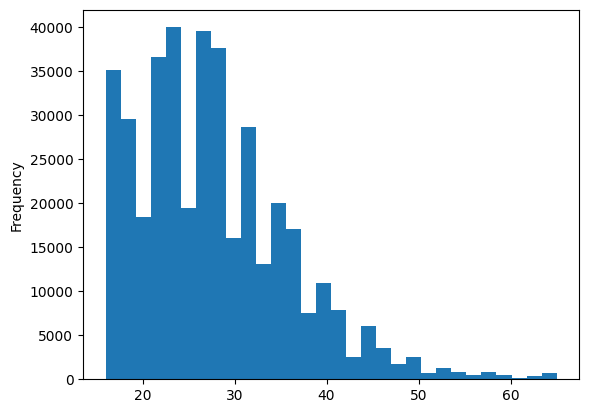

In [ ]:
df['user_age'].describe()
df['user_age'].plot(kind='hist', bins=30)


###### The Z-score method identified 4,267 potential outliers in user_age due to the right-skewed (non-normal) distribution of the data. These values represent valid age observations rather than true anomalies.